In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#filename, y_check = "input_test.txt", 10
filename, y_check = "input.txt", 2000000 #Fails if trying to use meshgrids

In [3]:
with open(filename) as f:
    lines = f.read().split('\n')
    lines = [l0.strip() for l0 in lines]

In [4]:
def get_manhattan_distance(p, q):
    """ 
    Return the manhattan distance between points p and q
    assuming both to have the same number of dimensions
    """
    # sum of absolute difference between coordinates
    distance = 0
    for p_i,q_i in zip(p,q):
        distance += abs(p_i - q_i)
    
    return distance

In [5]:
sensors_beacons = []
import re
for line0 in lines:
    if len(line0)>0:
        sensorestr, beaconstr = line0.split(':')

        sensor_x, sensor_y = sensorestr.split(',')
        print(f"sensor_x:{sensor_x}, sensr_y:{sensor_y}")

        sensor_x0 = int(sensor_x[sensor_x.find('x=')+2 : ])
        sensor_y0 = int(sensor_y[sensor_y.find('y=')+2 : ])

        beacon_x , beacon_y = beaconstr.split(',')
        print(f"sensor_x:{sensor_x}, sensr_y:{sensor_y}")
        beacon_x0 = int(beacon_x[beacon_x.find('x=')+2 : ])
        beacon_y0 = int(beacon_y[beacon_y.find('y=')+2 : ])

        s = (sensor_x0, sensor_y0)
        b = (beacon_x0, beacon_y0)

        d = get_manhattan_distance(s,b)
        sensors_beacons.append( ( s , b, d ) )

sensor_x:Sensor at x=3844106, sensr_y: y=3888618
sensor_x:Sensor at x=3844106, sensr_y: y=3888618
sensor_x:Sensor at x=1380352, sensr_y: y=1857923
sensor_x:Sensor at x=1380352, sensr_y: y=1857923
sensor_x:Sensor at x=272, sensr_y: y=1998931
sensor_x:Sensor at x=272, sensr_y: y=1998931
sensor_x:Sensor at x=2119959, sensr_y: y=184595
sensor_x:Sensor at x=2119959, sensr_y: y=184595
sensor_x:Sensor at x=1675775, sensr_y: y=2817868
sensor_x:Sensor at x=1675775, sensr_y: y=2817868
sensor_x:Sensor at x=2628344, sensr_y: y=2174105
sensor_x:Sensor at x=2628344, sensr_y: y=2174105
sensor_x:Sensor at x=2919046, sensr_y: y=3736158
sensor_x:Sensor at x=2919046, sensr_y: y=3736158
sensor_x:Sensor at x=16, sensr_y: y=2009884
sensor_x:Sensor at x=16, sensr_y: y=2009884
sensor_x:Sensor at x=2504789, sensr_y: y=3988246
sensor_x:Sensor at x=2504789, sensr_y: y=3988246
sensor_x:Sensor at x=2861842, sensr_y: y=2428768
sensor_x:Sensor at x=2861842, sensr_y: y=2428768
sensor_x:Sensor at x=3361207, sensr_y: y

In [6]:
sensors_beacons

[((3844106, 3888618), (3225436, 4052707), 782759),
 ((1380352, 1857923), (10411, 2000000), 1512018),
 ((272, 1998931), (10411, 2000000), 11208),
 ((2119959, 184595), (2039500, -250317), 515371),
 ((1675775, 2817868), (2307516, 3313037), 1126910),
 ((2628344, 2174105), (3166783, 2549046), 913380),
 ((2919046, 3736158), (3145593, 4120490), 610879),
 ((16, 2009884), (10411, 2000000), 20279),
 ((2504789, 3988246), (3145593, 4120490), 773048),
 ((2861842, 2428768), (3166783, 2549046), 425219),
 ((3361207, 130612), (2039500, -250317), 1702636),
 ((831856, 591484), (-175938, 1260620), 1676930),
 ((3125600, 1745424), (3166783, 2549046), 844805),
 ((21581, 3243480), (10411, 2000000), 1254650),
 ((2757890, 3187285), (2307516, 3313037), 576126),
 ((3849488, 2414083), (3166783, 2549046), 817668),
 ((3862221, 757146), (4552923, 1057347), 990903),
 ((3558604, 2961030), (3166783, 2549046), 803805),
 ((3995832, 1706663), (4552923, 1057347), 1206407),
 ((1082213, 3708082), (2307516, 3313037), 1620348),

In [7]:
#Get minimums and maximums, both on sensors and considering beacons distances to calculate maximums
xmin, xmax, ymin, ymax = 0,0,0,0
for i, sbd in enumerate(sensors_beacons):
    s, b, d = sbd
    sx, sy = s
    bx,by = b

    x0 = sx-d
    x1 = sx+d
    y0 = sy-d
    y1 = sy+d

    if i==0:
        xmin = x0
        xmax = x1
        ymin = y0
        ymax = y1
    else:
        xmin = min(x0,xmin)
        xmax = max(x1,xmax)
        ymin = min(y0,ymin)
        ymax = max(y1,ymax)

xmin, xmax, ymin, ymax

(-1233069, 5202239, -1572024, 5328430)

# Generate area based in instructions

Remember to reference points using xmin and ymin

In [8]:
x_values = np.arange(xmin,xmax+1)
y_value = y_check

In [9]:
SENSOR=1
BEACON=2
COVERED=3

In [10]:
def manh_dist_np(y_np, x_np, y0, x0):
    dist = np.abs(x_np-x0)+np.abs(y_np-y0)
    return dist

In [11]:
area_coverage = np.zeros_like(x_values)
for sbd in sensors_beacons:
    s, b,d = sbd
    
    sx, sy = s
    bx,by = b

    #Cover with sensors
    d_to_sensor = manh_dist_np(y_value,x_values, sy,sx)
    area_coverage = np.where( d_to_sensor<=d, COVERED, area_coverage)

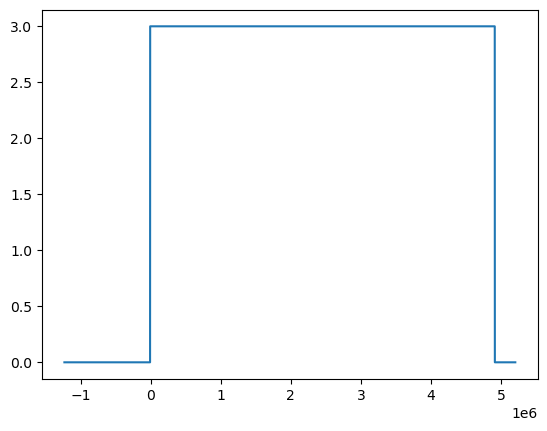

In [12]:
plt.plot(x_values, area_coverage)

In [13]:
area = np.array(area_coverage)
for sbd in sensors_beacons:
    s, b,d = sbd
    
    sx, sy = s
    bx,by = b
    
    if sy==y_value:
        area = np.where( x_values==sx, SENSOR, area)

    if by==y_value:
        area = np.where( x_values==bx, BEACON, area)


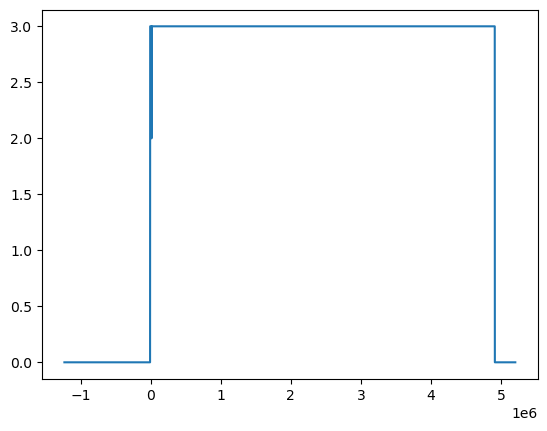

In [14]:
plt.plot(x_values, area)

In [15]:
non_valid_beacon_locations = np.logical_and(area==COVERED, area!=BEACON)

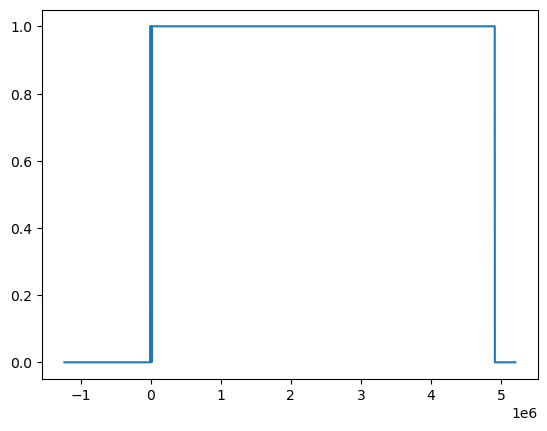

In [16]:
plt.plot(x_values, non_valid_beacon_locations)

In [17]:
np.sum(non_valid_beacon_locations)

4919281

OK